<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#classification" data-toc-modified-id="classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>classification</a></span><ul class="toc-item"><li><span><a href="#set-up-data" data-toc-modified-id="set-up-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>set up data</a></span></li><li><span><a href="#logistic-regression" data-toc-modified-id="logistic-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>logistic regression</a></span><ul class="toc-item"><li><span><a href="#Formula-for-Sigmoid-function" data-toc-modified-id="Formula-for-Sigmoid-function-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Formula for Sigmoid function</a></span></li><li><span><a href="#plotting-decision-boundary" data-toc-modified-id="plotting-decision-boundary-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>plotting decision boundary</a></span></li><li><span><a href="#logistic-loss-and-cost-function" data-toc-modified-id="logistic-loss-and-cost-function-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>logistic loss and cost function</a></span></li><li><span><a href="#gradient-descent" data-toc-modified-id="gradient-descent-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>gradient descent</a></span></li></ul></li><li><span><a href="#logistic-regression-with-scikit-learn" data-toc-modified-id="logistic-regression-with-scikit-learn-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>logistic regression with scikit learn</a></span></li></ul></li></ul></div>

reference: Andrew Ng's Machine Learning Specialization course

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('utility files/deeplearning.mplstyle')

In [2]:
#from lab_utils_common import dlc, plot_data, draw_vthresh
#from plt_one_addpt_onclick import plt_one_addpt_onclick

# classification

## set up data

In [3]:
# dataset 1
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

# dataset 2
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

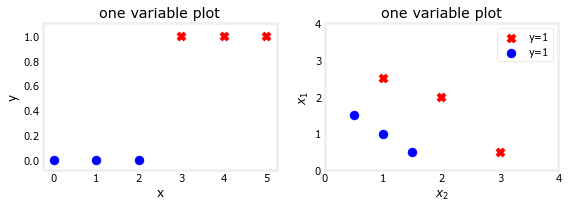

In [5]:
# plot dataset 1 and dataset 2 and label if they are positive or negative
positive = y_train == 1
negative = y_train == 0

fig, ax = plt.subplots(1,2, figsize = (8,3))

# one variable plot
ax[0].scatter(x_train[positive], y_train[positive], color = 'r', marker = 'x', s= 50, label = "y=1")
ax[0].scatter(x_train[negative], y_train[negative], color = "b", marker = 'o', s=80, label = "y=1")
ax[0].set_ylim(-0.08, 1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')

# two-variable plot
ax[1].scatter(X_train2[positive,0], X_train2[positive,1], color = 'r', marker = 'x', s= 50, label = "y=1")
ax[1].scatter(X_train2[negative,0], X_train2[negative,1], color = "b", marker = 'o', s=80, label = "y=1")
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_2$', fontsize=12)
ax[1].set_title('one variable plot')
ax[1].legend()

plt.tight_layout()

## logistic regression

### Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.

`z = np.dot(w, x) + b`

In [6]:
def sigmoid(z):
    """
    Compute the sigmoid function of z
    
    Args:
    z (ndarray): A scalar array of any size
    
    return:
    g (ndarray): sigmoid(z), same shape as z
    """
    
    g = 1/(1+np.exp(-z))
    
    return g

In [7]:
# test sigmoid function
z_tmp = np.arange(-10,10)
y = sigmoid(z_tmp)

# stack z_tmp and y together for comparison
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]]


In [8]:
# Draws a threshold at 0.5
# code from Andrew Ng's machine learning specialization course
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
plt.style.use('./deeplearning.mplstyle')
from matplotlib.patches import FancyArrowPatch

def draw_vthresh(ax,x):
    """ draws a threshold """
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
    ax.annotate("z >= 0", xy= [x,0.5], xycoords='data',
                xytext=[30,5],textcoords='offset points')
    d = FancyArrowPatch(
        posA=(x, 0.5), posB=(x+3, 0.5), color=dldarkred,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(d)
    ax.annotate("z < 0", xy= [x,0.5], xycoords='data',
                 xytext=[-50,5],textcoords='offset points', ha='left')
    f = FancyArrowPatch(
        posA=(x, 0.5), posB=(x-3, 0.5), color=dlblue,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(f)


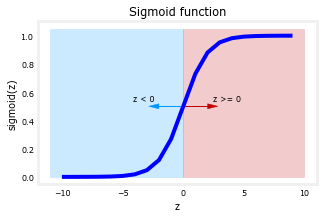

In [9]:
# plot sigmoid(z) against z

fig,ax = plt.subplots(1,1, figsize=(5,3))
ax.plot(z_tmp, y, c="blue")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

# draw threshold
draw_vthresh(ax,0)

sigmoid function approaches 0 if z is large negative, <br> 
sigmoid function approaches 1 if z is large positive.

### plotting decision boundary

Knowing that $f(x) = g(z)$, <br>

if  $z >= 0$, y is predicted to be positive, <br>
if $z <= 0$, y is predicted to be negative,

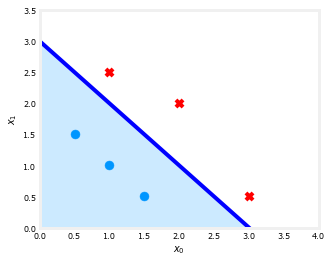

In [10]:
# example with dataset2- let z = -3 + x0+x1 = 0
x0 = np.arange(-1,5)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
ax.scatter(X_train2[positive,0], X_train2[positive,1], color = 'r', marker = 'x', s= 50, label = "y=1")
ax.scatter(X_train2[negative,0], X_train2[negative,1], color = dlc["dlblue"], marker = 'o', s=80, label = "y=1")
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')

plt.show()

### logistic loss and cost function

 In short, <br>
>**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set

**Loss function formula**<br>
 $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
 
**Cost function formula**<br>
$Cost function =\frac{1}{m}\sum\limits_{i = 0}^{m-1} loss$

In [11]:
def compute_cost_logistic(X,y,w,b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m= X.shape[0]
    cost = 0
    
    for i in range(m):
        z_i = np.dot(w,X[i]) + b
        f_wb = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
        
    cost = cost/m
    return cost

In [12]:
# test compute cost function
w_tmp = np.zeros_like(x_train[0])
b_tmp = 0

compute_cost_logistic(x_train.reshape(-1,), y_train, w_tmp, b_tmp)

0.6931471805599453

### gradient descent

step 1: compute gradient <br>
Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

step 2: compute gradient descent
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [13]:
def compute_gradient(X,y,w,b):
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    return
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_db = 0
    dj_dw = np.zeros(n,) 
    
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i],w) + b) 
        err = f_wb - y[i]
        dj_db += err
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j] 
    
    dj_db = dj_db / m
    dj_dw = dj_dw /m
    
    return dj_db, dj_dw

In [14]:
# test compute_gradient function
w_tmp = np.array([2])
b_tmp = 0
dj_db, dj_dw = compute_gradient(x_train.reshape([-1,1]), y_train, w_tmp, b_tmp)
print(f"dj_db={dj_db}\ndj_dw={dj_dw}")

dj_db=0.39332624947666445
dj_dw=[0.47263973]


In [15]:
import math
def gradient_descent(X,y,w_in, b_in, alpha, num_iter):
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """    
    w = w_in
    b = b_in
    J_history = []
    
    for i in range(num_iter):
        dj_db, dj_dw = compute_gradient(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i< 10000:
            J_history.append(compute_cost_logistic(X,y,w,b))
            
        if i % math.ceil(num_iter/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
            
    return w, b, J_history

In [17]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alpha = 0.1
iters = 20000

w_out, b_out, _ = gradient_descent(x_train.reshape(-1,1), y_train, w_tmp, b_tmp, alpha, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [0.64331581]   
Iteration 2000: Cost [0.07793459]   
Iteration 4000: Cost [0.0506706]   
Iteration 6000: Cost [0.03799054]   
Iteration 8000: Cost [0.03043365]   
Iteration 10000: Cost [0.02538227]   
Iteration 12000: Cost [0.02538227]   
Iteration 14000: Cost [0.02538227]   
Iteration 16000: Cost [0.02538227]   
Iteration 18000: Cost [0.02538227]   

updated parameters: w:[6.36199692], b:[-15.72286835]


## logistic regression with scikit learn

In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train2, y_train2)

LogisticRegression()

In [19]:
# find out coef_ and intercept_ (w,b)
b = lr_model.intercept_
w = lr_model.coef_
print(f"w = {w}, b = {b}")

w = [[0.90411349 0.73587543]], b = [-2.33371631]


In [20]:
# make predictions
x_test = np.array([[1,2],[3,4]])

y_pred = lr_model.predict(x_test)
print("Prediction on training set:", y_pred)

Prediction on training set: [1 1]


In [21]:
print("Accuracy on training set:", lr_model.score(X_train2, y_train2))

Accuracy on training set: 1.0
